In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [9]:
df = pd.read_csv('C:/Users/shiva/OneDrive/Desktop/My Stuff/Projects/Data-Analysis-Projects/LoanApproval/loan_approval_dataset.csv')

# Shape of the data

In [10]:
df.shape

(4269, 13)

In [11]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [16]:
df.drop_duplicates()
df.drop('loan_id',axis=1, inplace=True)

In [17]:
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

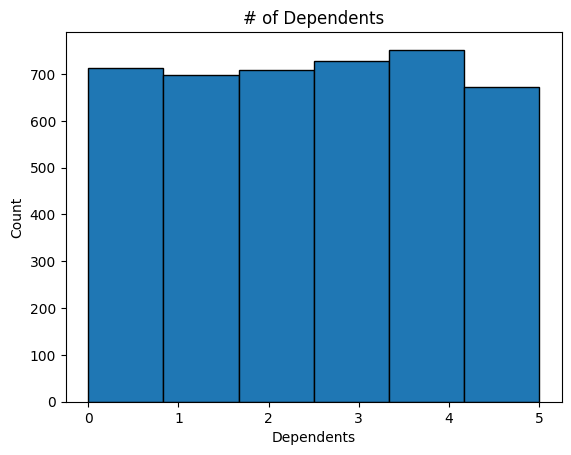

In [18]:
# Histogram for # of dependents
plt.hist(df['no_of_dependents'], bins=6, edgecolor='black')
plt.title('# of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

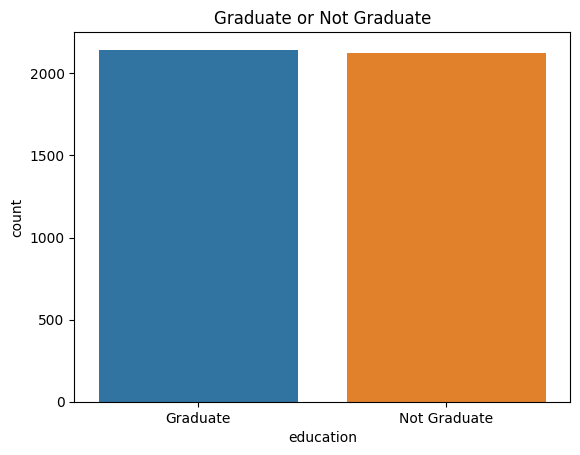

In [19]:
# Bar plot for education
sns.countplot(x='education',data=df)
plt.title('Graduate or Not Graduate')
plt.show()

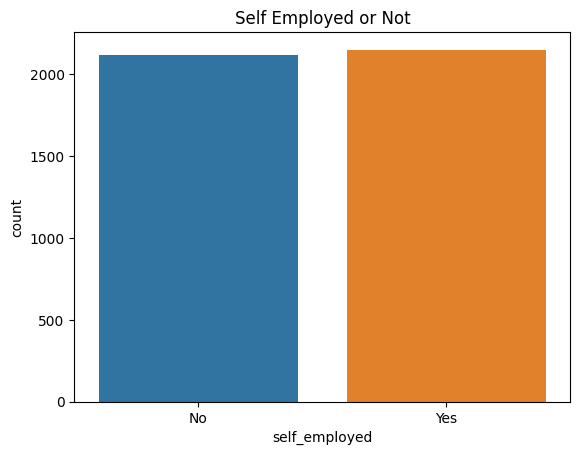

In [20]:
# Bar plot for self-employed or not
sns.countplot(x='self_employed',data=df)
plt.title('Self Employed or Not')
plt.show()

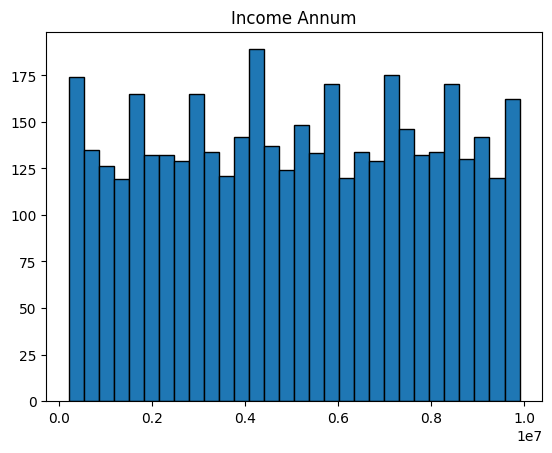

In [21]:
# Histogram for income
plt.hist(df['income_annum'],bins=30,edgecolor='black')
plt.title('Income Annum')
plt.show()

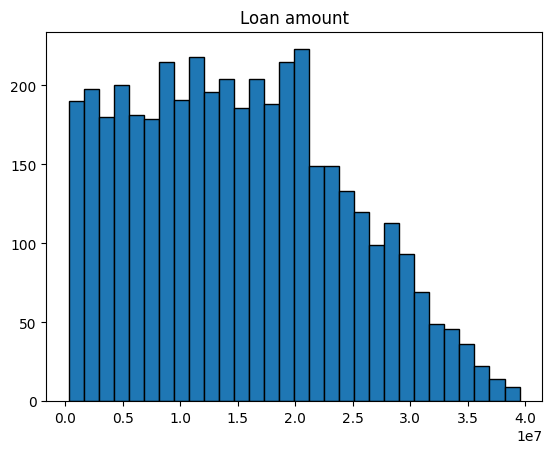

In [22]:
# Histogram of loan amount
plt.hist(df['loan_amount'], bins=30,edgecolor='black')
plt.title('Loan amount')
plt.show()

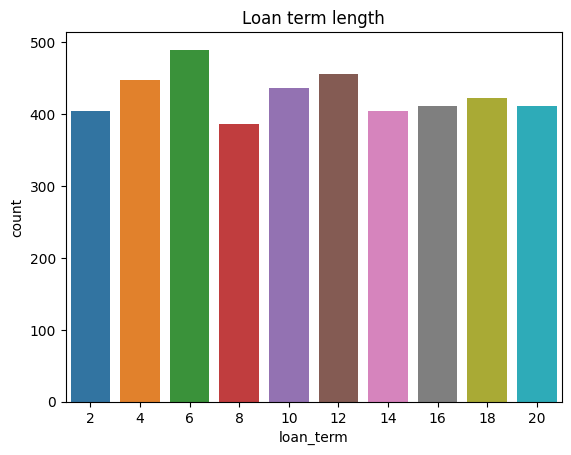

In [24]:
# Bar plot for loan term length
sns.countplot(x='loan_term', data=df)
plt.title('Loan term length')
plt.show()

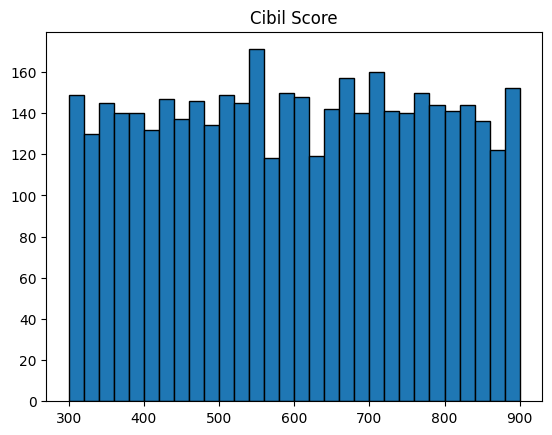

In [25]:
# Histogram for cibil_score
plt.hist(df['cibil_score'], bins=30,edgecolor='black')
plt.title('Cibil Score')
plt.show()

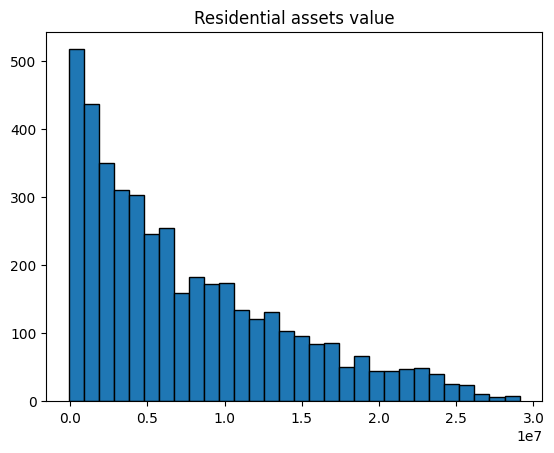

In [26]:
# Histogram for residential asset value
plt.hist(df['residential_assets_value'], bins=30,edgecolor='black')
plt.title('Residential assets value')
plt.show()

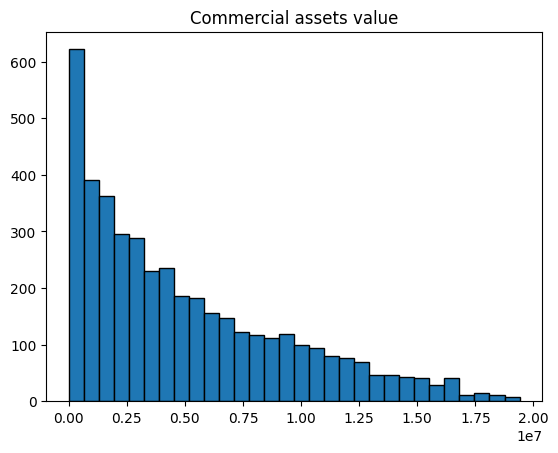

In [27]:
# Histogram for commerical_assets
plt.hist(df['commercial_assets_value'], bins=30,edgecolor='black')
plt.title('Commercial assets value')
plt.show()

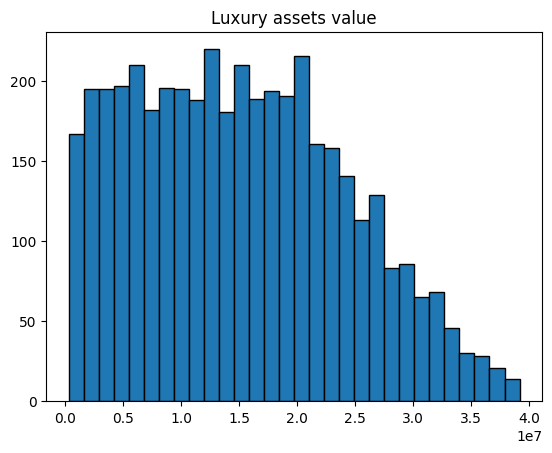

In [28]:
# Histogram for luxury assets
plt.hist(df['luxury_assets_value'], bins=30,edgecolor='black')
plt.title('Luxury assets value')
plt.show()

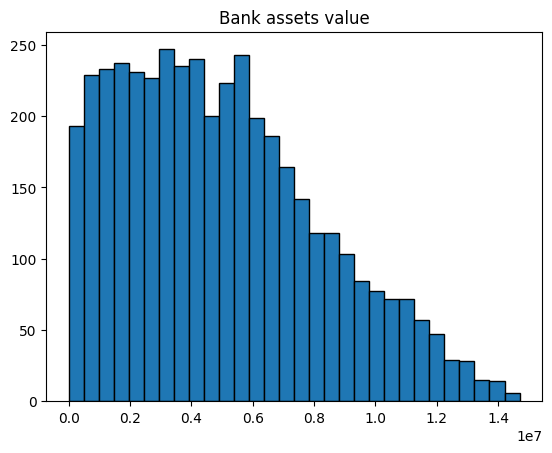

In [29]:
# Histogram for bank assets
plt.hist(df['bank_asset_value'], bins=30,edgecolor='black')
plt.title('Bank assets value')
plt.show()

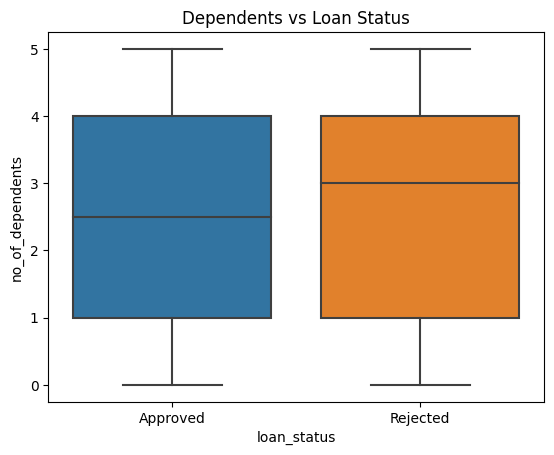

In [30]:
# Boxplot dependents vs loan status classification
sns.boxplot(x='loan_status', y='no_of_dependents', data=df)
plt.title('Dependents vs Loan Status')
plt.show()

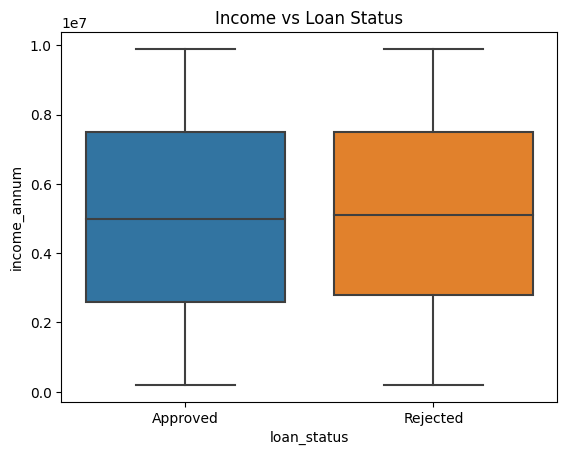

In [31]:
# Boxplot income vs loan status classification
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('Income vs Loan Status')
plt.show()

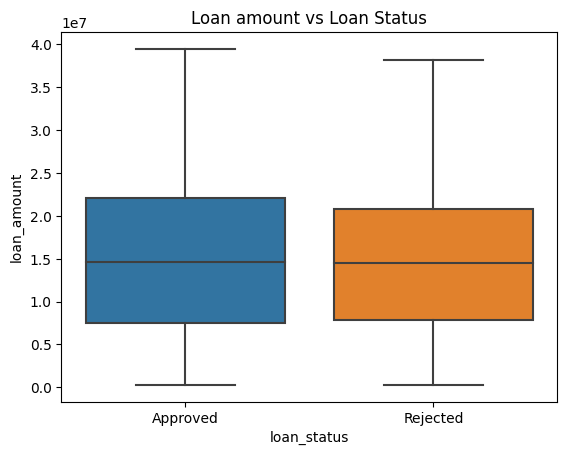

In [32]:
# Boxplot loan amount vs loan status classification
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title('Loan amount vs Loan Status')
plt.show()

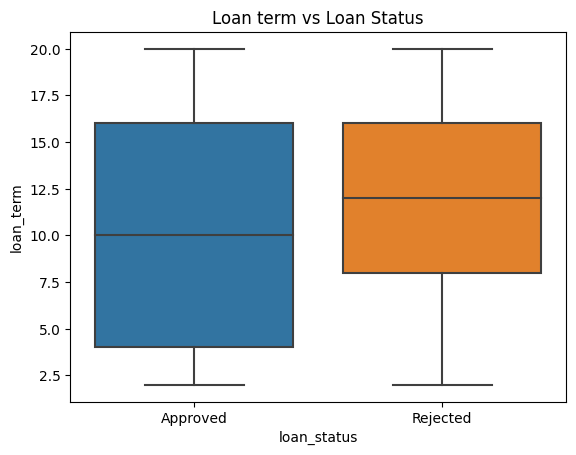

In [33]:
# Boxplot loan term vs loan status classification
sns.boxplot(x='loan_status', y='loan_term', data=df)
plt.title('Loan term vs Loan Status')
plt.show()

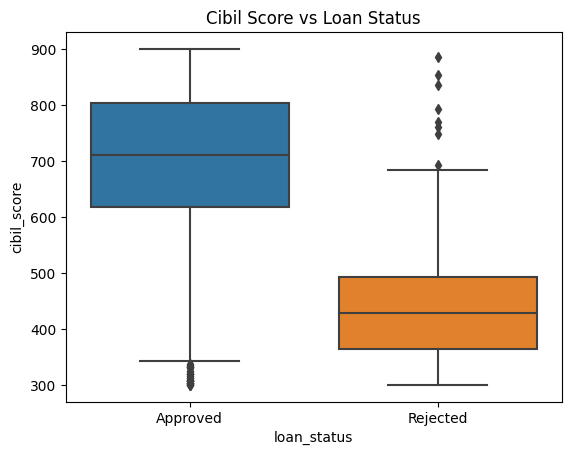

In [34]:
# Boxplot cibil score vs loan status classification
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('Cibil Score vs Loan Status')
plt.show()

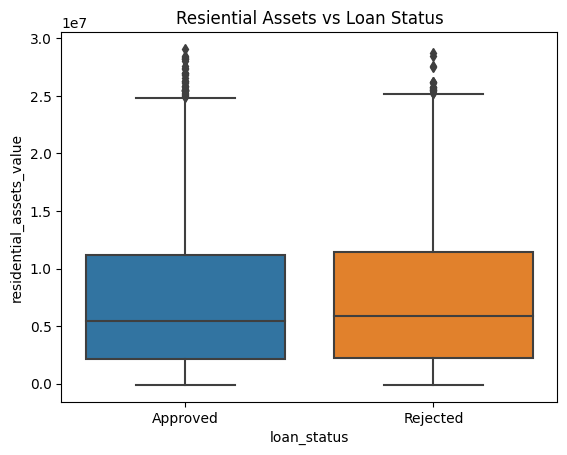

In [35]:
# Boxplot residential assets vs loan status classification
sns.boxplot(x='loan_status', y='residential_assets_value', data=df)
plt.title('Resiential Assets vs Loan Status')
plt.show()

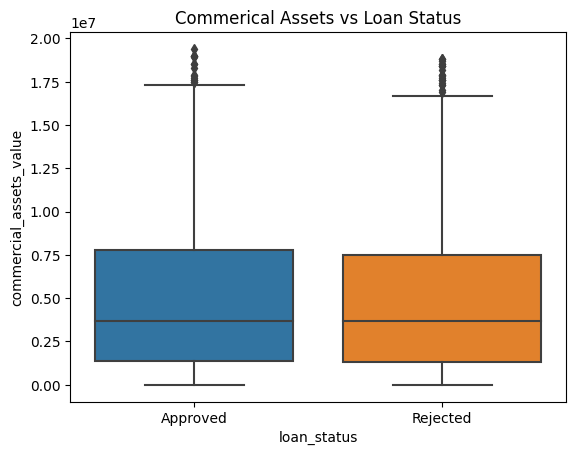

In [36]:
# Boxplot commerical assets vs loan status classification
sns.boxplot(x='loan_status', y='commercial_assets_value', data=df)
plt.title('Commerical Assets vs Loan Status')
plt.show()

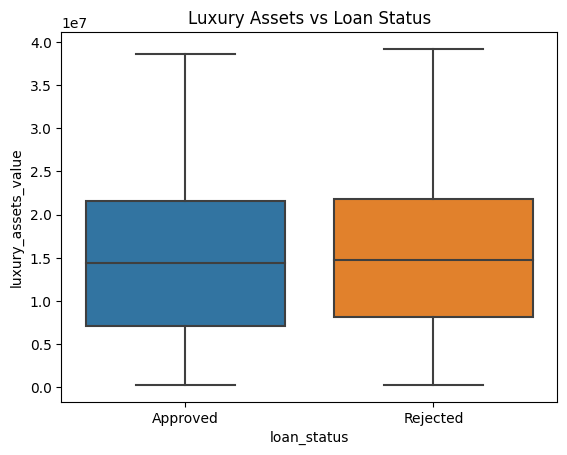

In [37]:
# Boxplot luxury assets vs loan status classification
sns.boxplot(x='loan_status', y='luxury_assets_value', data=df)
plt.title('Luxury Assets vs Loan Status')
plt.show()

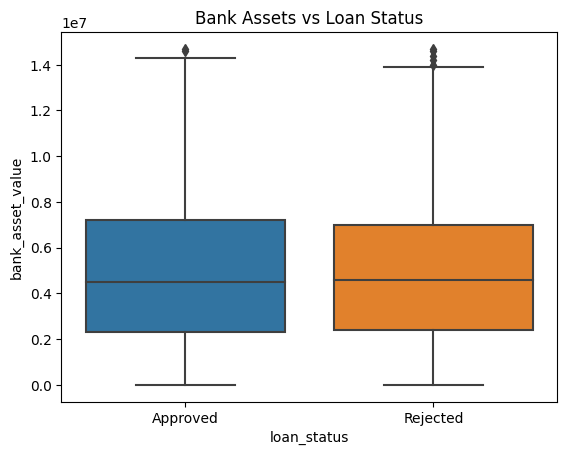

In [38]:
# Boxplot bank assets vs loan status classification
sns.boxplot(x='loan_status', y='bank_asset_value', data=df)
plt.title('Bank Assets vs Loan Status')
plt.show()

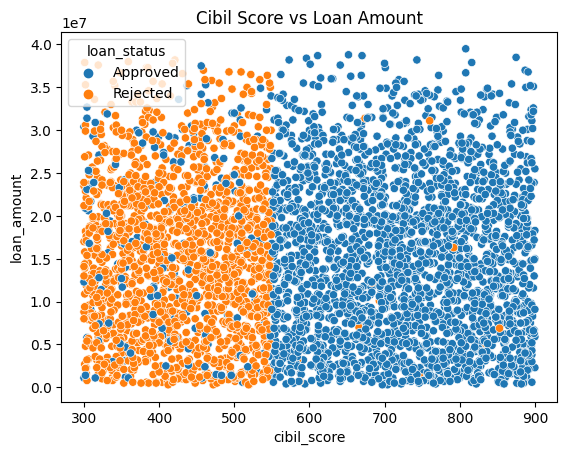

In [39]:
# Scatterplot Cibil Score vs Loan Amount colored by Loan status
sns.scatterplot(x='cibil_score', y='loan_amount', hue='loan_status', data=df)
plt.title('Cibil Score vs Loan Amount')
plt.show()

In [40]:
data = df.copy()

In [41]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    
    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name,axis=1),dummies],axis=1)
    return df

#Perform one-hot encoding on the self employment variable
data = perform_one_hot_encoding(data, 'self_employed')
#Replace loan status approved and rejected with 1 and 0 to do corr analysis
data['loan_status'] = data['loan_status'].replace(['Approved', 'Rejected'], [1,0])

rank=['Not Graduate','Graduate']
oe = OrdinalEncoder(categories=[rank])
data['education'] = oe.fit_transform(data[['education']])
data.head()

,no_of_dependents,education,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,self_employed_No,self_employed_Yes
0,2,1.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,1,0
1,0,0.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,0,1
2,3,1.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,1,0
3,3,1.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1,0
4,5,0.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,0,1


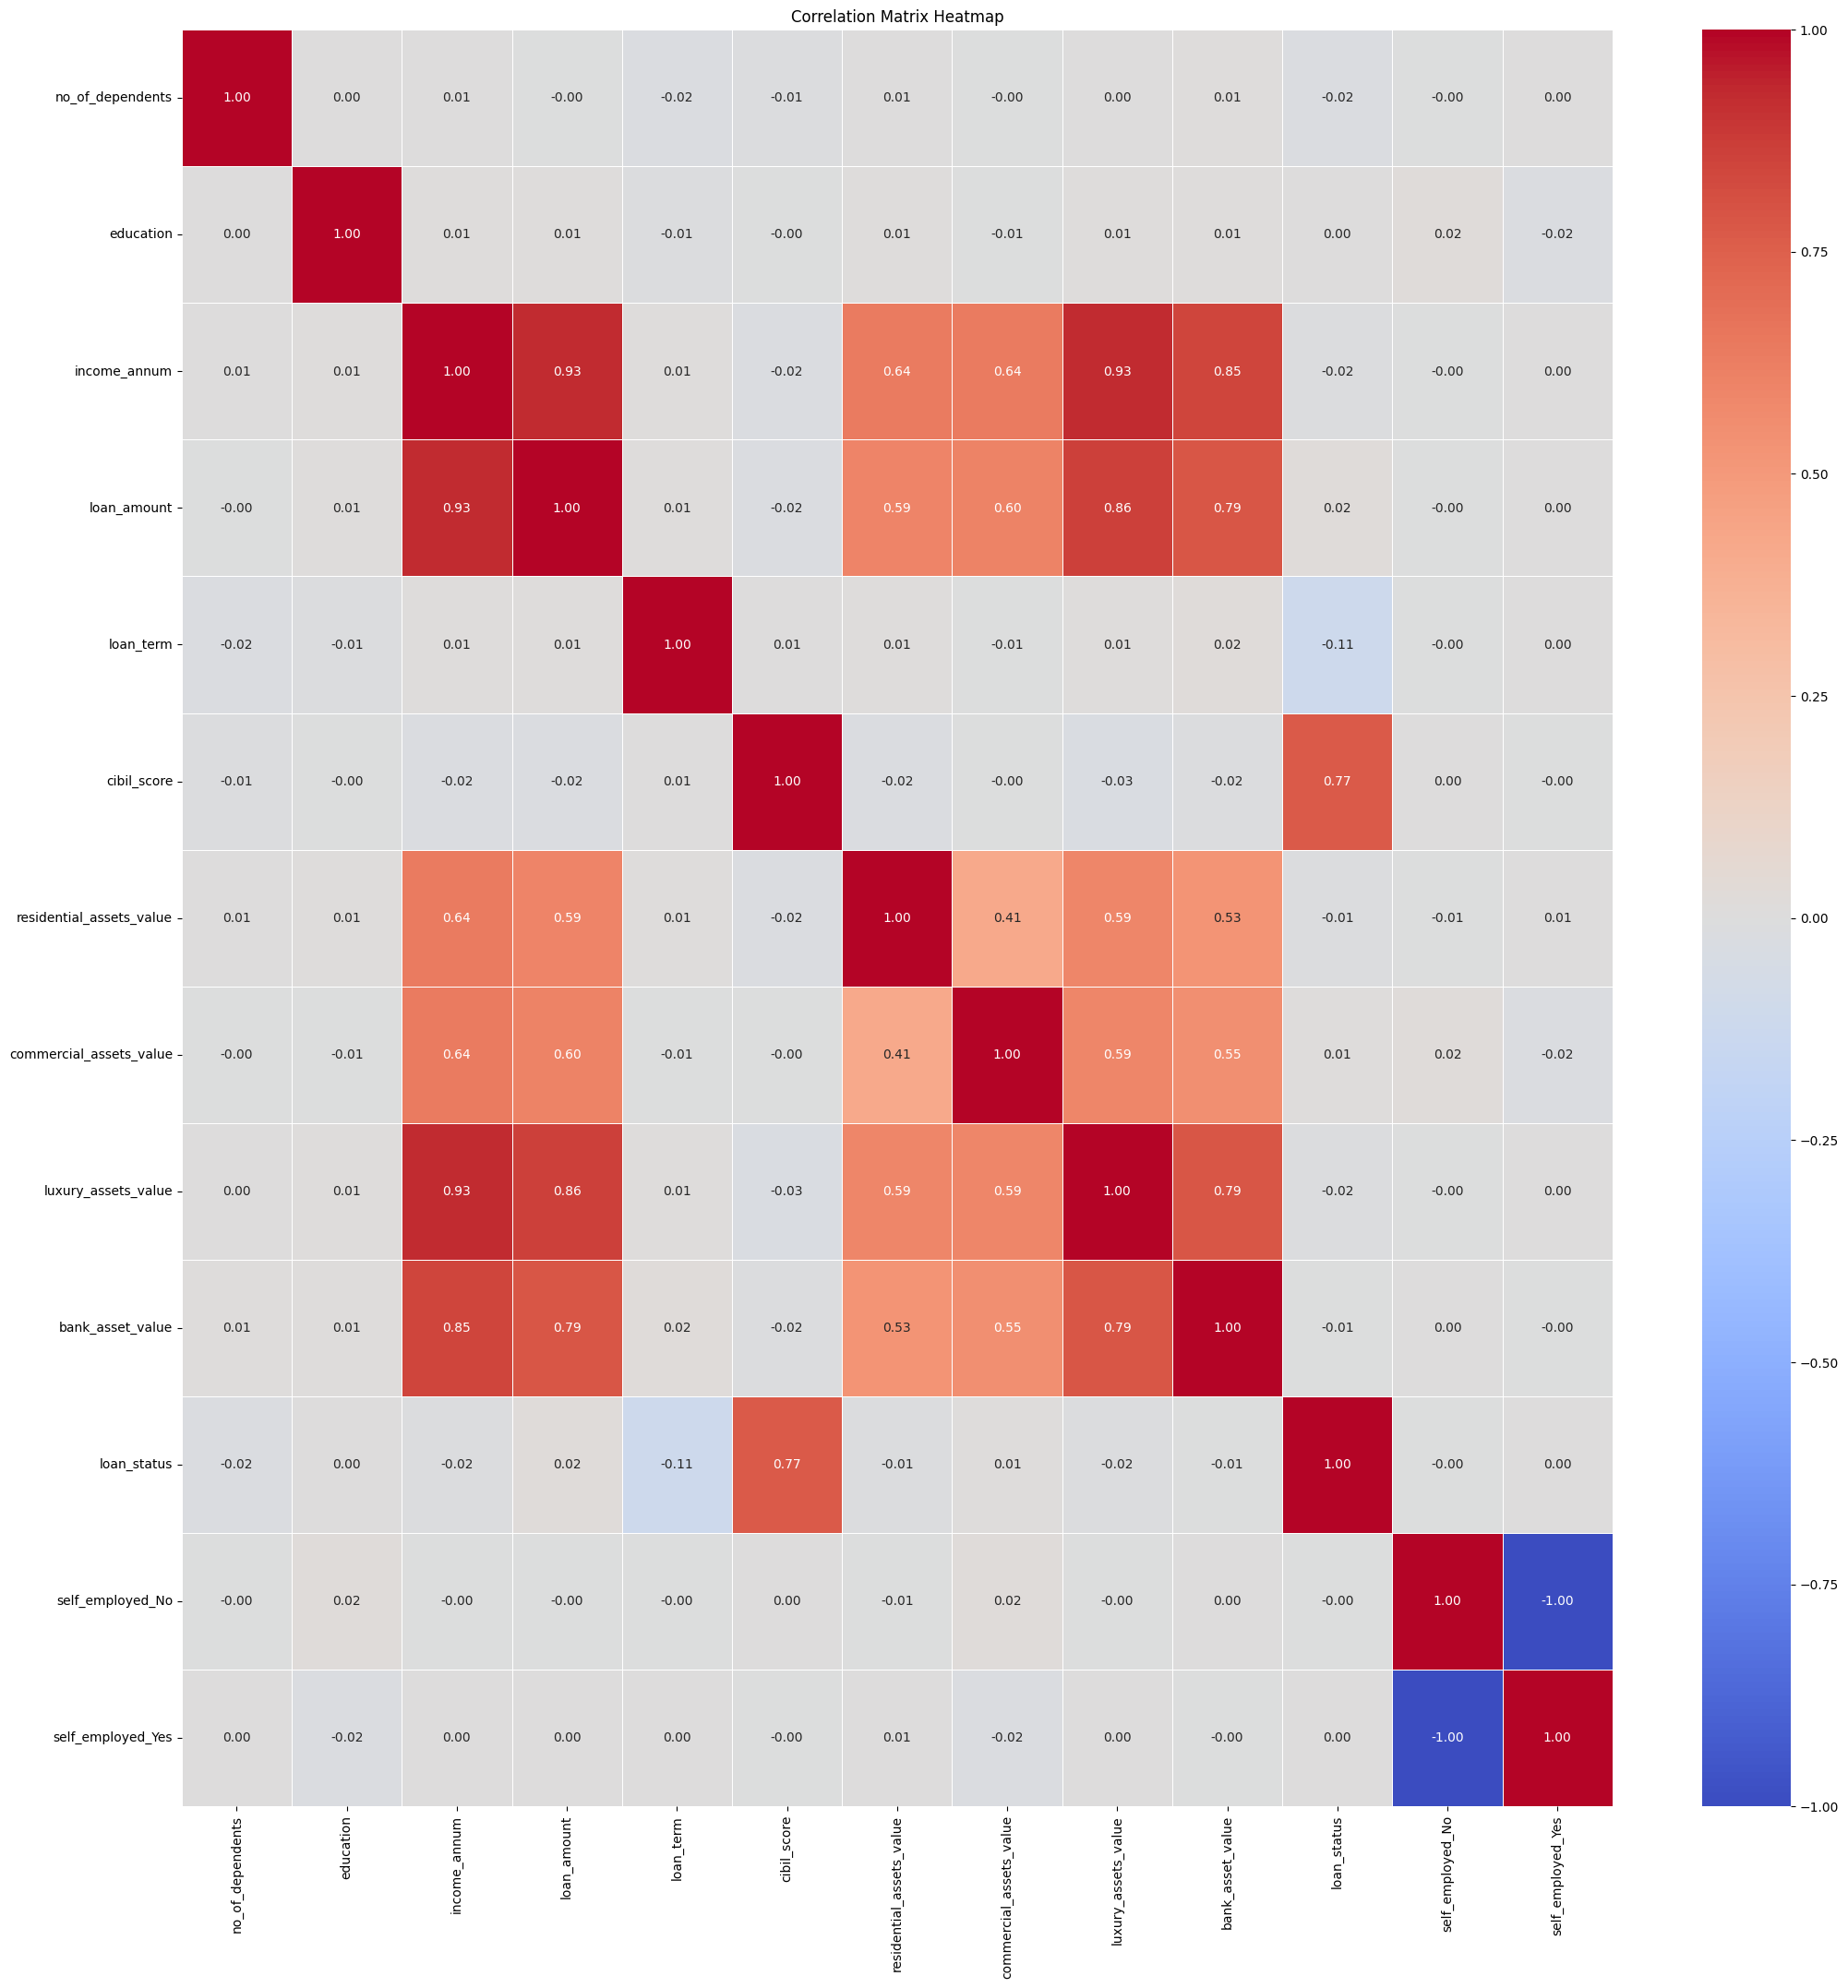

In [42]:
correlation_matrix = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

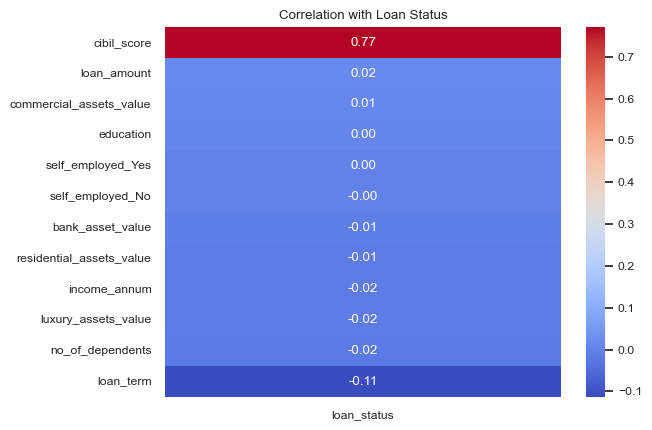

In [43]:
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['loan_status'].drop('loan_status')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Loan Status')
plt.show()